# $\Phi$-SO demo

## Packages import

In [1]:
# conda env
!echo $CONDA_PREFIX

/opt/homebrew/Caskroom/miniforge/base/envs/PhySO


In [2]:
# External packages
import torch
import numpy as np
import pandas as pd
import scipy
# Pyplot
%matplotlib inline
import matplotlib.pyplot as plt

# Internal code import
import physo
from physo.learn import monitoring
from physo.task  import benchmark

In [3]:
# Device
DEVICE = 'cpu'
if torch.cuda.is_available():
    DEVICE = 'cuda'
print(DEVICE)

cpu


In [4]:
torch.cuda.is_available()

False

## Test case

In [5]:
df = pd.read_csv("Scolnic_2018.txt", sep=" ", index_col=False)

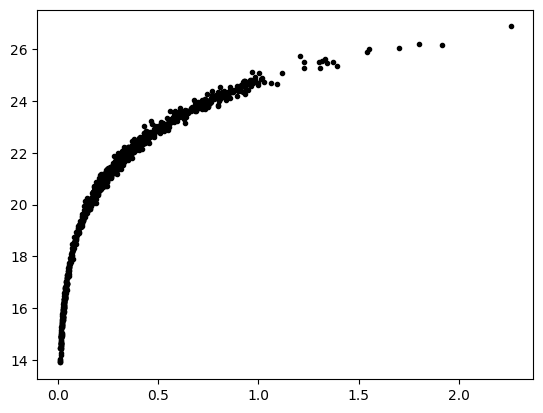

In [6]:
plt.plot(df["zcmb"], df["mb"], "k.")

In [7]:
z_array = df["zcmb"].to_numpy()
mu_array_target = df["mb"] + 19.253 # https://iopscience.iop.org/article/10.3847/2041-8213/ac5c5b

In [8]:
H0       = 73.3 #km/s/Mpc
Omega_m0 = 0.315
c = 3e5 # km/s

y_LCDM = lambda z: (H0**2)*(Omega_m0*(1+z)**3 + 1 - Omega_m0)
H_LCDM = lambda z: np.sqrt(y_LCDM(z))  # in Mpc


In [9]:
def mu (z, H_func):
    def integrand (zp):
        #Hp_zp = scipy.misc.derivative(H_func, zp) #H_func(zp) #scipy.misc.derivative(H_func, zp)
        res = c/H_func(zp)
        return res
    integral = np.array([scipy.integrate.quad_vec(integrand, 0, z_i) for z_i in z])[:,0]
    dL = (1+z)*integral # in Mpc
    mu_z = 5*np.log10(dL/1e-5) # 10 pc = 1e-5 Mpc
    return mu_z

In [10]:
mu_z = mu(z = z_array, H_func = H_LCDM)



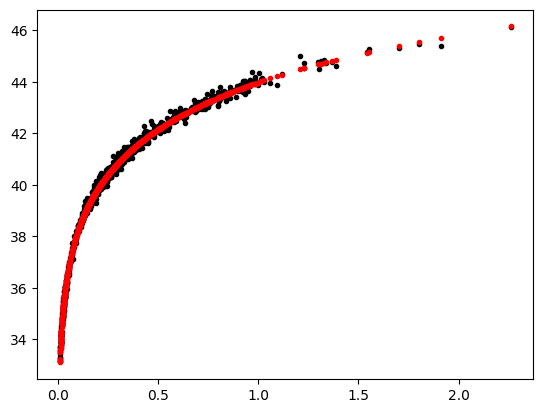

In [11]:
plt.plot(df["zcmb"], mu_array_target, "k.")
plt.plot(df["zcmb"],  mu_z, "r.")
